# Plot data basics, metadata
Number of subjects, age, trimester, sex, infer NA sex

In [1]:
library(ggplot2)
library(data.table)
library(dplyr)
library(patchwork)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
setwd("~/project-gandalm/isoform_twas/eqtl_new/")

### 1: Number of subjects

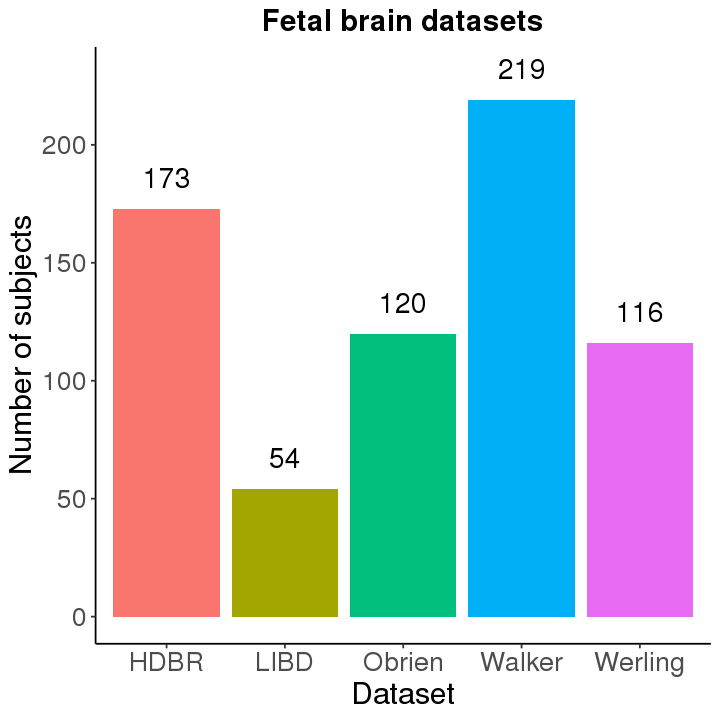

In [3]:
options(repr.plot.width=6, repr.plot.height=6)
df <- data.frame("data" = c("Walker", "Obrien", "Werling", "HDBR", "LIBD"),
                 "count" = c(219, 120, 116, 173, 54))
p1 <- ggplot(df, aes(x = data, y = count, fill = data)) +
  geom_bar(stat = "identity") +
  labs(x = "Dataset", y = "Number of subjects", title = "Fetal brain datasets") +
  geom_text(aes(label = count),vjust = -1, size = 6) + 
  theme_classic() +
  theme(axis.text = element_text(size = 16),
        axis.title = element_text(size = 18),
        plot.title = element_text(size = 18, face="bold", hjust = 0.5),
        legend.position = "none") +
  ylim(0, 230)
p1

In [90]:
# ggsave("figures/subjects.png", p1, width = 6, height = 6)

### 2: Age

In [3]:
metadata_df <- read.table("metadata_674_study.tsv", header = T, stringsAsFactors = F)

In [4]:
head(metadata_df)

,Dataset,Age,Sex
,<chr>,<dbl>,<chr>
1,Werling,-0.4027397,F
2,Werling,-0.4602740,M
3,Werling,-0.4219178,M
4,Werling,-0.4027397,F
5,Werling,-0.4823288,F
6,Werling,-0.4794521,F


In [7]:
for (i in c(13, 26)) {
    print((i-40)*7/365)
}

[1] -0.5178082
[1] -0.2684932


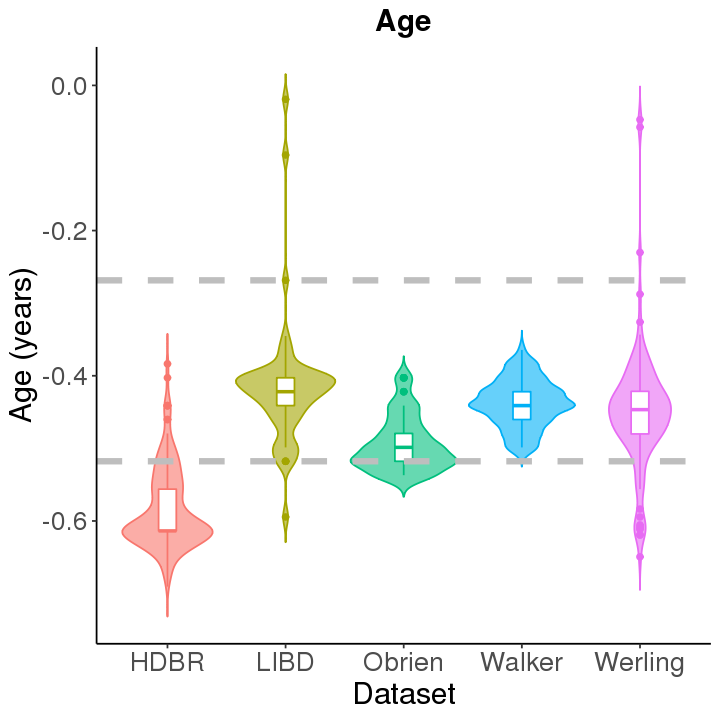

In [8]:
p2 <- ggplot(metadata_df, aes(x = Dataset, y = Age, fill = Dataset, color = Dataset)) +
  geom_violin(alpha = .6, trim = FALSE) +
  geom_boxplot(width = 0.15, fill='white') +
  labs(x = "Dataset", y = "Age (years)", title = "Age") + 
  theme_classic() +
  theme(axis.text = element_text(size = 16),
        axis.title = element_text(size = 18),
        plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
        legend.position = "none") +
  geom_hline(yintercept = -0.5178082, linetype = 'dashed', col = 'grey', size = 1.8) +
  geom_hline(yintercept = -0.2684932, linetype = 'dashed', col = 'grey', size = 1.8)
p2

In [8]:
# ggsave("figures/age.png", p2, width = 6, height = 6)

### 3: Trimester

In [9]:
metadata_df$trimester <- NA
for (i in 1:nrow(metadata_df)){
  pcw <- metadata_df[i,"Age"]*365/7+40
  if (pcw <= 13){
    metadata_df[i,"trimester"] <- 1
  }
  if (13 < pcw & pcw <= 26){
    metadata_df[i,"trimester"] <- 2
  }
  if (pcw > 26){
    metadata_df[i,"trimester"] <- 3
  }
}

In [10]:
table(metadata_df$trimester)


  1   2   3 
193 475   6 

In [11]:
metadata_df <- metadata_df %>% mutate(pcw = Age*365/7+40)

In [12]:
range(metadata_df$pcw)

[1]  4 39

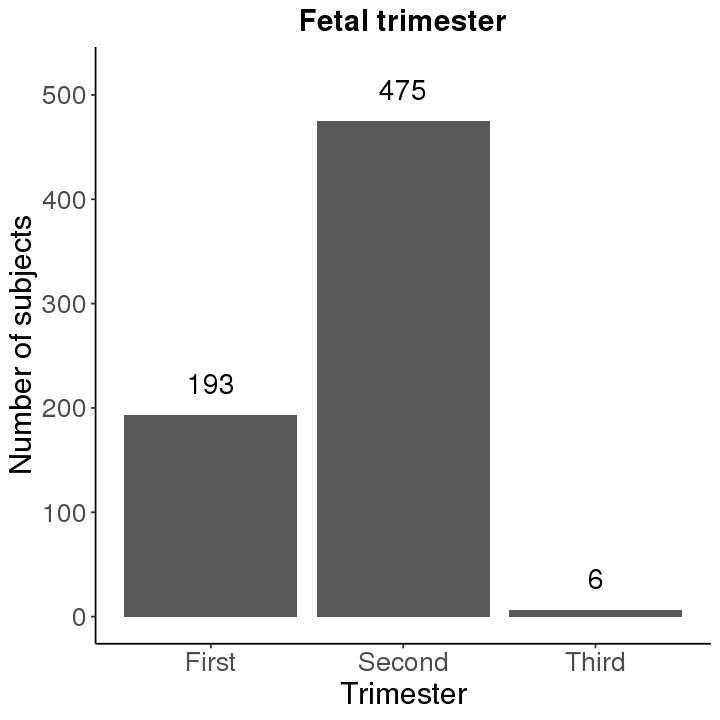

In [13]:
tri_df <- data.frame("Trimester" = c("First","Second","Third"),
                     "Count" = c(193, 475, 6))

p3 <- ggplot(tri_df, aes(x = Trimester, y = Count)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = Count),vjust = -1, size = 6) +
  labs(title = "Fetal trimester", x = "Trimester", y = "Number of subjects") +
  theme_classic() +
  theme(axis.text=element_text(size = 16), 
        axis.title=element_text(size = 18), 
        plot.title = element_text(size = 18, face="bold", hjust = 0.5)) +
  ylim(0, 520)
p3

In [17]:
# ggsave("figures/trimester.png", p3, width = 6, height = 6)

**For n=654, write out trimester subject lists**

In [5]:
meta <- read.table("metadata_inferSex.tsv", header = T, stringsAsFactors = F)
head(meta)
dim(meta)

,Subject,Age,Sex,inferSex
,<chr>,<dbl>,<chr>,<chr>
1,HSB100,-0.4027397,F,F
2,HSB152,-0.4602740,M,M
3,HSB195,-0.4219178,M,M
4,HSB221,-0.4027397,F,F
5,HSB222,-0.4823288,F,F
6,HSB238,-0.4794521,F,F


[1] 654   4

In [8]:
meta$trimester <- NA
for (i in 1:nrow(meta)){
  pcw <- meta[i,"Age"]*365/7+40
  if (pcw <= 13){
    meta[i,"trimester"] <- 1
  }
  if (13 < pcw & pcw <= 26){
    meta[i,"trimester"] <- 2
  }
  if (pcw > 26){
    meta[i,"trimester"] <- 3
  }
}

In [9]:
write.table(meta, "metadata_inferSex_trimester.tsv", col.names = T, row.names = F, sep = "\t", quote = F)
table(meta$trimester)


  1   2   3 
179 469   6 

### 4: Sex

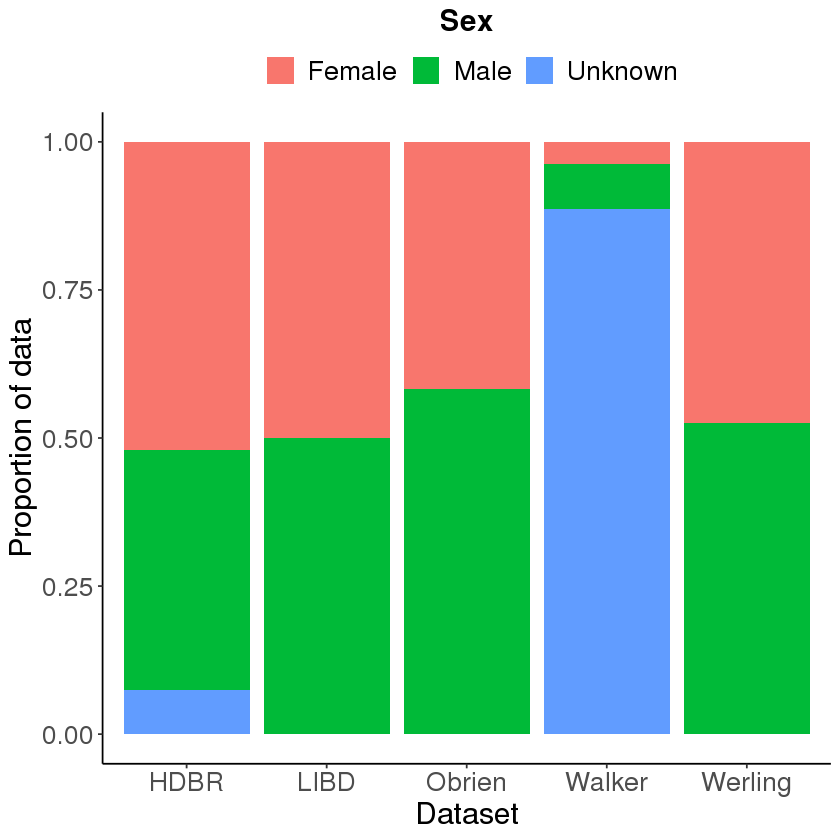

In [77]:
sex_df <- data.frame("data" = c(rep("Walker",3), rep("Obrien",3), rep("Werling",3), rep("HDBR",3), rep("LIBD",3)),
                     "sex" = rep(c("F","M","unknown"),5),
                     "count" = rep(NA, 15))

for (i in c("Walker", "Obrien", "Werling", "HDBR", "LIBD")) {
  sex_df[which(sex_df$data == i)[1],"count"] <- sum(metadata_df$Dataset == i & metadata_df$Sex =="F")
  sex_df[which(sex_df$data == i)[2],"count"] <- sum(metadata_df$Dataset == i & metadata_df$Sex =="M")
  sex_df[which(sex_df$data == i)[3],"count"] <- sum(metadata_df$Dataset == i & metadata_df$Sex =="unknown")
}

p4 <- ggplot(sex_df, aes(x = data, fill = sex, y = count)) +
  geom_bar(position = "fill", stat = "identity") +
  labs(title = "Sex", x = "Dataset", y = "Proportion of data", fill = "") +
  theme_classic() +
  theme(axis.text=element_text(size = 16), 
        axis.title=element_text(size = 18), 
        plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
       legend.text = element_text(size = 16),
        legend.title = element_text(size = 16),
         legend.position = "top") +
  scale_fill_discrete(labels = c("Female", "Male", "Unknown"))
p4

In [78]:
# ggsave("figures/sex.png", p4, width = 6, height = 6)

### 5: Infer sex (on 654 subjects with gene expression)
- XIST is female determining
- There are several genes on Y that are also on X (pseudo autosomal), should use PC1 of the non pseudo autosomal y genes (non PAR). Otherwise, no difference between sexes

In [14]:
gene_expr <- fread("../salmon/expression.final/gene.TPM.tsv", data.table = F)
rownames(gene_expr) <- gene_expr$V1
gene_expr <- gene_expr[,-1]

Warning message in fread("../salmon/expression.final/gene.TPM.tsv", data.table = F):
“Detected 654 column names but the data has 655 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”


In [15]:
gencode <- fread("../salmon/gencode.v33lift37.annotation.gene.tsv", data.table = F)

** First extract chrY non PAR genes **

In [16]:
y_gene <- gencode %>% filter(V1 == "chrY")

In [17]:
dim(y_gene)

[1] 584   9

In [18]:
keep <- !grepl("PAR", y_gene[,"V9"])
y_gene_nonPAR <- y_gene[keep,]

In [19]:
dim(y_gene_nonPAR)

[1] 534   9

In [20]:
y_gene_nonPAR_id <- c()
for (i in 1:nrow(y_gene_nonPAR)) {
  temp <- strsplit(y_gene_nonPAR[i,"V9"], split = " ")[[1]][2]
  y_gene_nonPAR_id[i] <- substr(temp, 2, nchar(temp)-2)
}

In [21]:
y_expr <- gene_expr[which(rownames(gene_expr) %in% y_gene_nonPAR_id),]
y_expr <- log2(.1 + y_expr)
y_expr_t <- as.data.frame(t(y_expr))

In [22]:
dim(y_expr)

[1] 483 654

**Now substract XIST**

In [23]:
xist_expr <- gene_expr["ENSG00000229807.12_6",]

In [24]:
xist_expr <- log2(.1+xist_expr)

** Now run PCA on chrY gene expression **

In [25]:
pca <- prcomp(y_expr_t[,which(apply(y_expr_t, 2, var) != 0)], scale. = TRUE)

In [26]:
# I have already inferred sex. Here just to make plots
meta <- read.table("metadata_inferSex.tsv", header = T, stringsAsFactors = F)

In [27]:
meta$xist <- NA
for (i in 1:nrow(meta)) {
  meta[i,"xist"] <- xist_expr[1, meta[i,"Subject"]]
}  

meta$ygenePC1 <- NA
for (i in 1:nrow(meta)) {
  meta[i, "ygenePC1"] <- pca$x[meta[i,"Subject"],1]
}

Warning message:
“Removed 4 rows containing missing values (geom_point).”


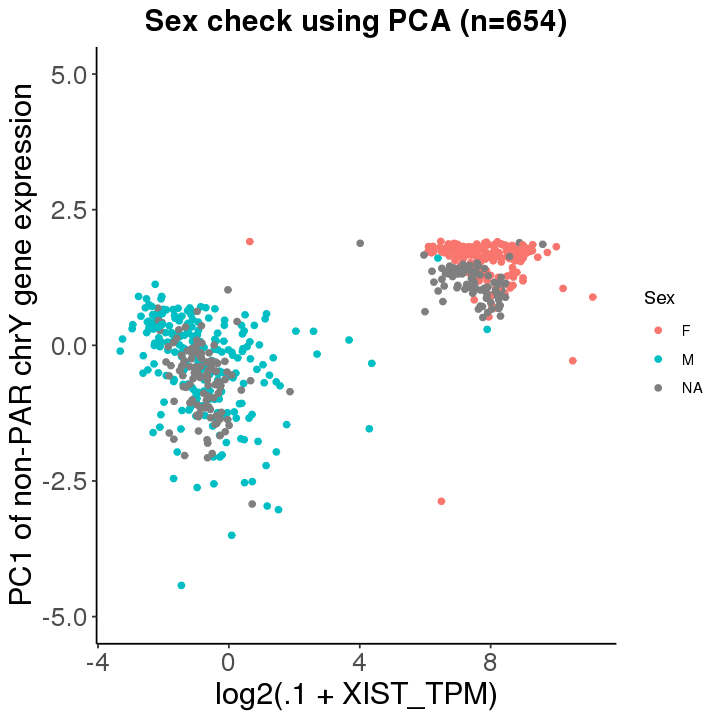

In [28]:
p5 <- ggplot(meta, aes(x = xist, y = ygenePC1, color = Sex)) +
  geom_point() +
  labs(x = "log2(.1 + XIST_TPM)",
       y = "PC1 of non-PAR chrY gene expression",
       title = "Sex check using PCA (n=654)",
       color = "Sex") +
  theme_classic() +
  theme(axis.text = element_text(size=16),
        axis.title = element_text(size=18),
        plot.title = element_text(size=18, face="bold", hjust = 0.5)) +
  ylim(-5, 5)
p5

** Alternatively, MDS on chrY gene expression **

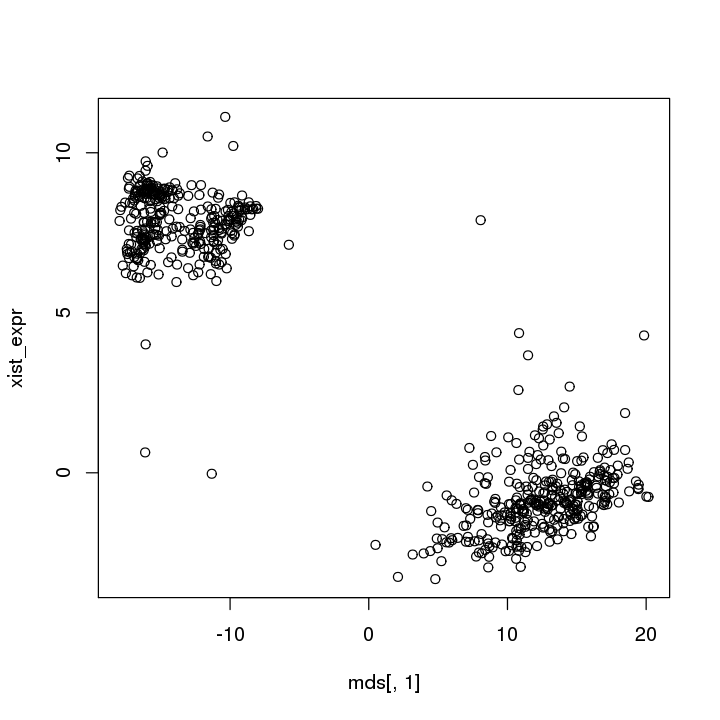

In [30]:
mds <- cmdscale(dist(y_expr_t))
plot(mds[,1], xist_expr)

In [31]:
meta$ygeneMDS1 <- NA
for (i in 1:nrow(meta)) {
  meta[i, "ygeneMDS1"] <- mds[meta[i,"Subject"],1]
}

In [42]:
head(meta)

,Subject,Age,Sex,inferSex,xist,ygenePC1,ygeneMDS1
,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,HSB100,-0.4027397,F,F,6.592317,1.7809956,-16.169361
2,HSB152,-0.4602740,M,M,1.446716,-0.6727377,12.574748
3,HSB195,-0.4219178,M,M,-2.074049,0.8555520,5.295721
4,HSB221,-0.4027397,F,F,7.125516,1.4133382,-5.761925
5,HSB222,-0.4823288,F,F,7.158714,1.8246400,-16.251994
6,HSB238,-0.4794521,F,F,7.790590,1.7720798,-15.703711


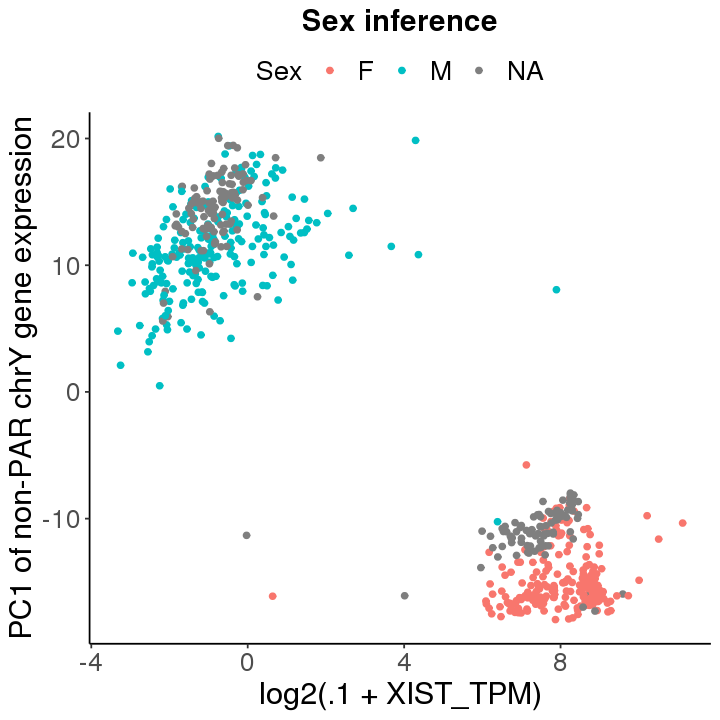

In [32]:
p6 <- ggplot(meta, aes(x = xist, y = ygeneMDS1, color = Sex)) +
  geom_point() +
  labs(x = "log2(.1 + XIST_TPM)",
       y = "PC1 of non-PAR chrY gene expression",
       title = "Sex inference",
       color = "Sex") +
  theme_classic() +
  theme(axis.text = element_text(size = 16),
        axis.title = element_text(size = 18),
        plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
       legend.text = element_text(size = 16),
        legend.title = element_text(size = 16),
         legend.position = "top") 
p6

In [54]:
# ggsave("figures/sex_check.png", p6, width = 6, height = 6)

** Now, infer NA sex **

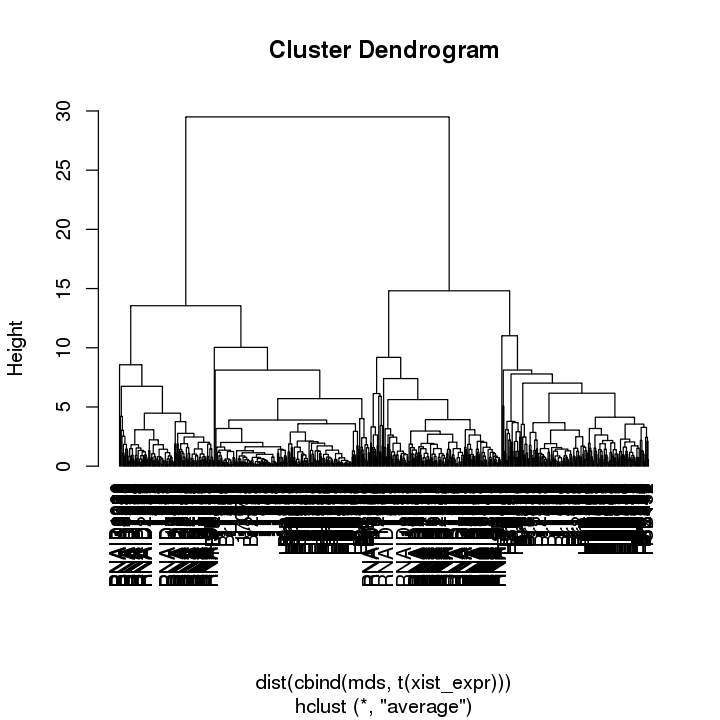

In [33]:
hc <- hclust(dist(cbind(mds, t(xist_expr))), method = "average")
plot(hc, hang = -1)

In [34]:
sub_group <- cutree(hc, k = 2)
table(sub_group)

sub_group
  1   2 
344 310 

In [32]:
# plot.new()
# rect.hclust(hc, k = 2, border = 2:3)

In [35]:
meta$inferSex2 <- NA
for(i in 1:nrow(meta)){
  if (sub_group[meta[i, "Subject"]] == 1) {
    meta[i, "inferSex2"] <- "M"
  }
  else if (sub_group[meta[i, "Subject"]] == 2) {
    meta[i, "inferSex2"] <- "F"
  }
  
}

In [36]:
# Check: am I getting the same results as before?
sum(meta$inferSex != meta$inferSex2)

[1] 0

In [37]:
# 2 subjects have inconsistent sex
# according to figure, use inferred sex
count <- 0
for (i in 1:nrow(meta)) {
  if(! is.na(meta[i, "Sex"])) {
    if(meta[i, "Sex"] != meta[i, "inferSex"]) {
      count <- count +1
    }
  }
}
count

# write.table(meta, "metadata_inferSex.tsv", col.names = T, row.names = F, quote = F, sep = "\t")

[1] 2

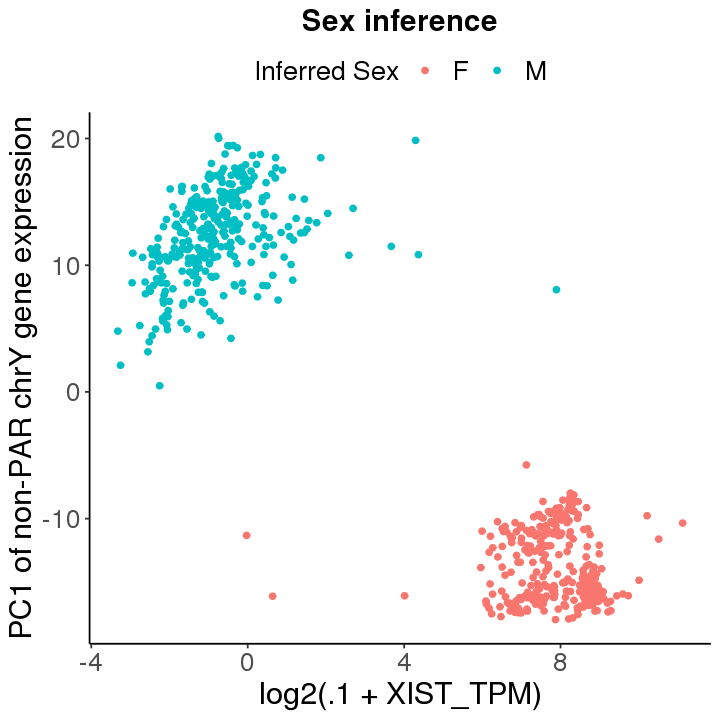

In [38]:
p7 <- ggplot(meta, aes(x = xist, y = ygeneMDS1, color = inferSex2)) +
  geom_point() +
  labs(x = "log2(.1 + XIST_TPM)",
       y = "PC1 of non-PAR chrY gene expression",
       title = "Sex inference",
       color = "Inferred Sex") +
  theme_classic() +
  theme(axis.text = element_text(size = 16),
        axis.title = element_text(size = 18),
        plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
       legend.text = element_text(size = 16),
        legend.title = element_text(size = 16),
         legend.position = "top") 
p7

In [39]:
# ggsave("figures/sex_check_inferred.png", p7, width = 6, height = 6)

In [40]:
meta$data <- NA
walker <- read.table("../genotype/all_data/isec_R2_greater_than_3/ancestry/geno_subj/geno_subj_walker.txt")
obrien <- read.table("../genotype/all_data/isec_R2_greater_than_3/ancestry/geno_subj/geno_subj_obrien.txt")
werling <- read.table("../genotype/all_data/isec_R2_greater_than_3/ancestry/geno_subj/geno_subj_werling.txt")
libd <- read.table("../genotype/all_data/isec_R2_greater_than_3/ancestry/geno_subj/geno_subj_libd.txt")
hdbr <- read.table("../genotype/all_data/isec_R2_greater_than_3/ancestry/geno_subj/geno_subj_hdbr.txt")

In [41]:
for(i in 1:nrow(meta)) {
  if(meta[i, "Subject"] %in% walker[,1]) {
    meta[i, "data"] <- "Walker"
  }
  if(meta[i, "Subject"] %in% obrien[,1]) {
    meta[i, "data"] <- "Obrien"
  }
  if(meta[i, "Subject"] %in% werling[,1]) {
    meta[i, "data"] <- "Werling"
  }
  if(meta[i, "Subject"] %in% hdbr[,1]) {
    meta[i, "data"] <- "HDBR"
  }
  if(meta[i, "Subject"] %in% libd[,1]) {
    meta[i, "data"] <- "LIBD"
  }
}

In [42]:
sex_df <- data.frame("data" = c(rep("Walker",2), rep("Obrien",2), rep("Werling",2), rep("HDBR",2), rep("LIBD",2)),
                     "sex" = rep(c("F","M"),5),
                     "count" = rep(NA, 10))
for (i in c("Walker", "Obrien", "Werling", "HDBR", "LIBD")) {
  sex_df[which(sex_df$data == i)[1],"count"] <- sum(meta$data == i & meta$inferSex =="F")
  sex_df[which(sex_df$data == i)[2],"count"] <- sum(meta$data == i & meta$inferSex =="M")
}

In [70]:
head(sex_df)

,data,sex,count
,<fct>,<fct>,<int>
1,Walker,F,92
2,Walker,M,119
3,Obrien,F,50
4,Obrien,M,70
5,Werling,F,56
6,Werling,M,60


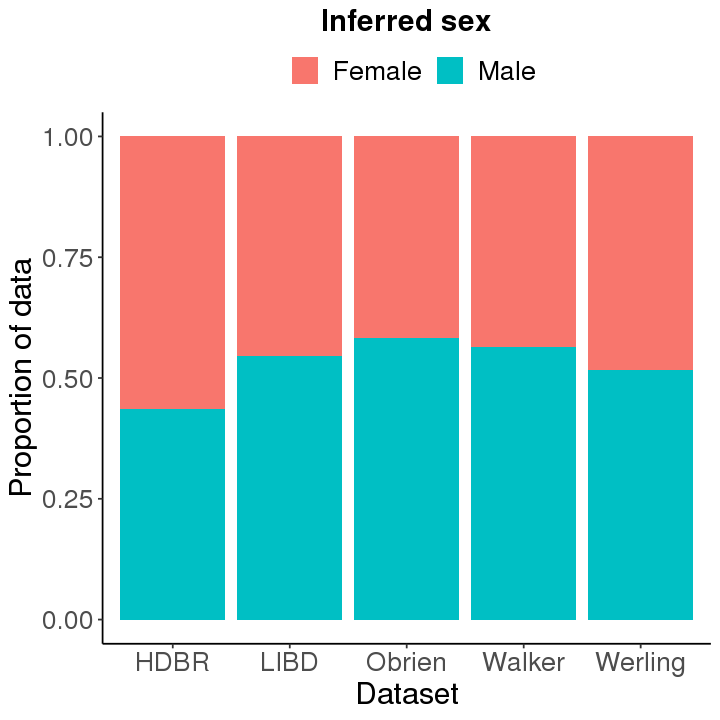

In [43]:
p8 <- ggplot(sex_df, aes(x = data, fill = sex, y = count)) +
  geom_bar(position = "fill", stat = "identity") +
  labs(title = "Inferred sex", x = "Dataset", y = "Proportion of data",
       fill = "") +
  theme_classic() +
  theme(axis.text=element_text(size = 16), 
        axis.title=element_text(size = 18), 
        plot.title = element_text(size = 18, face="bold", hjust = 0.5),
       legend.text = element_text(size = 16),
        legend.title = element_text(size = 16),
         legend.position = "top") +
  scale_fill_discrete(labels = c("Female", "Male"))
p8

In [44]:
# ggsave("figures/sex_inferred.png", height = 6, width = 6)

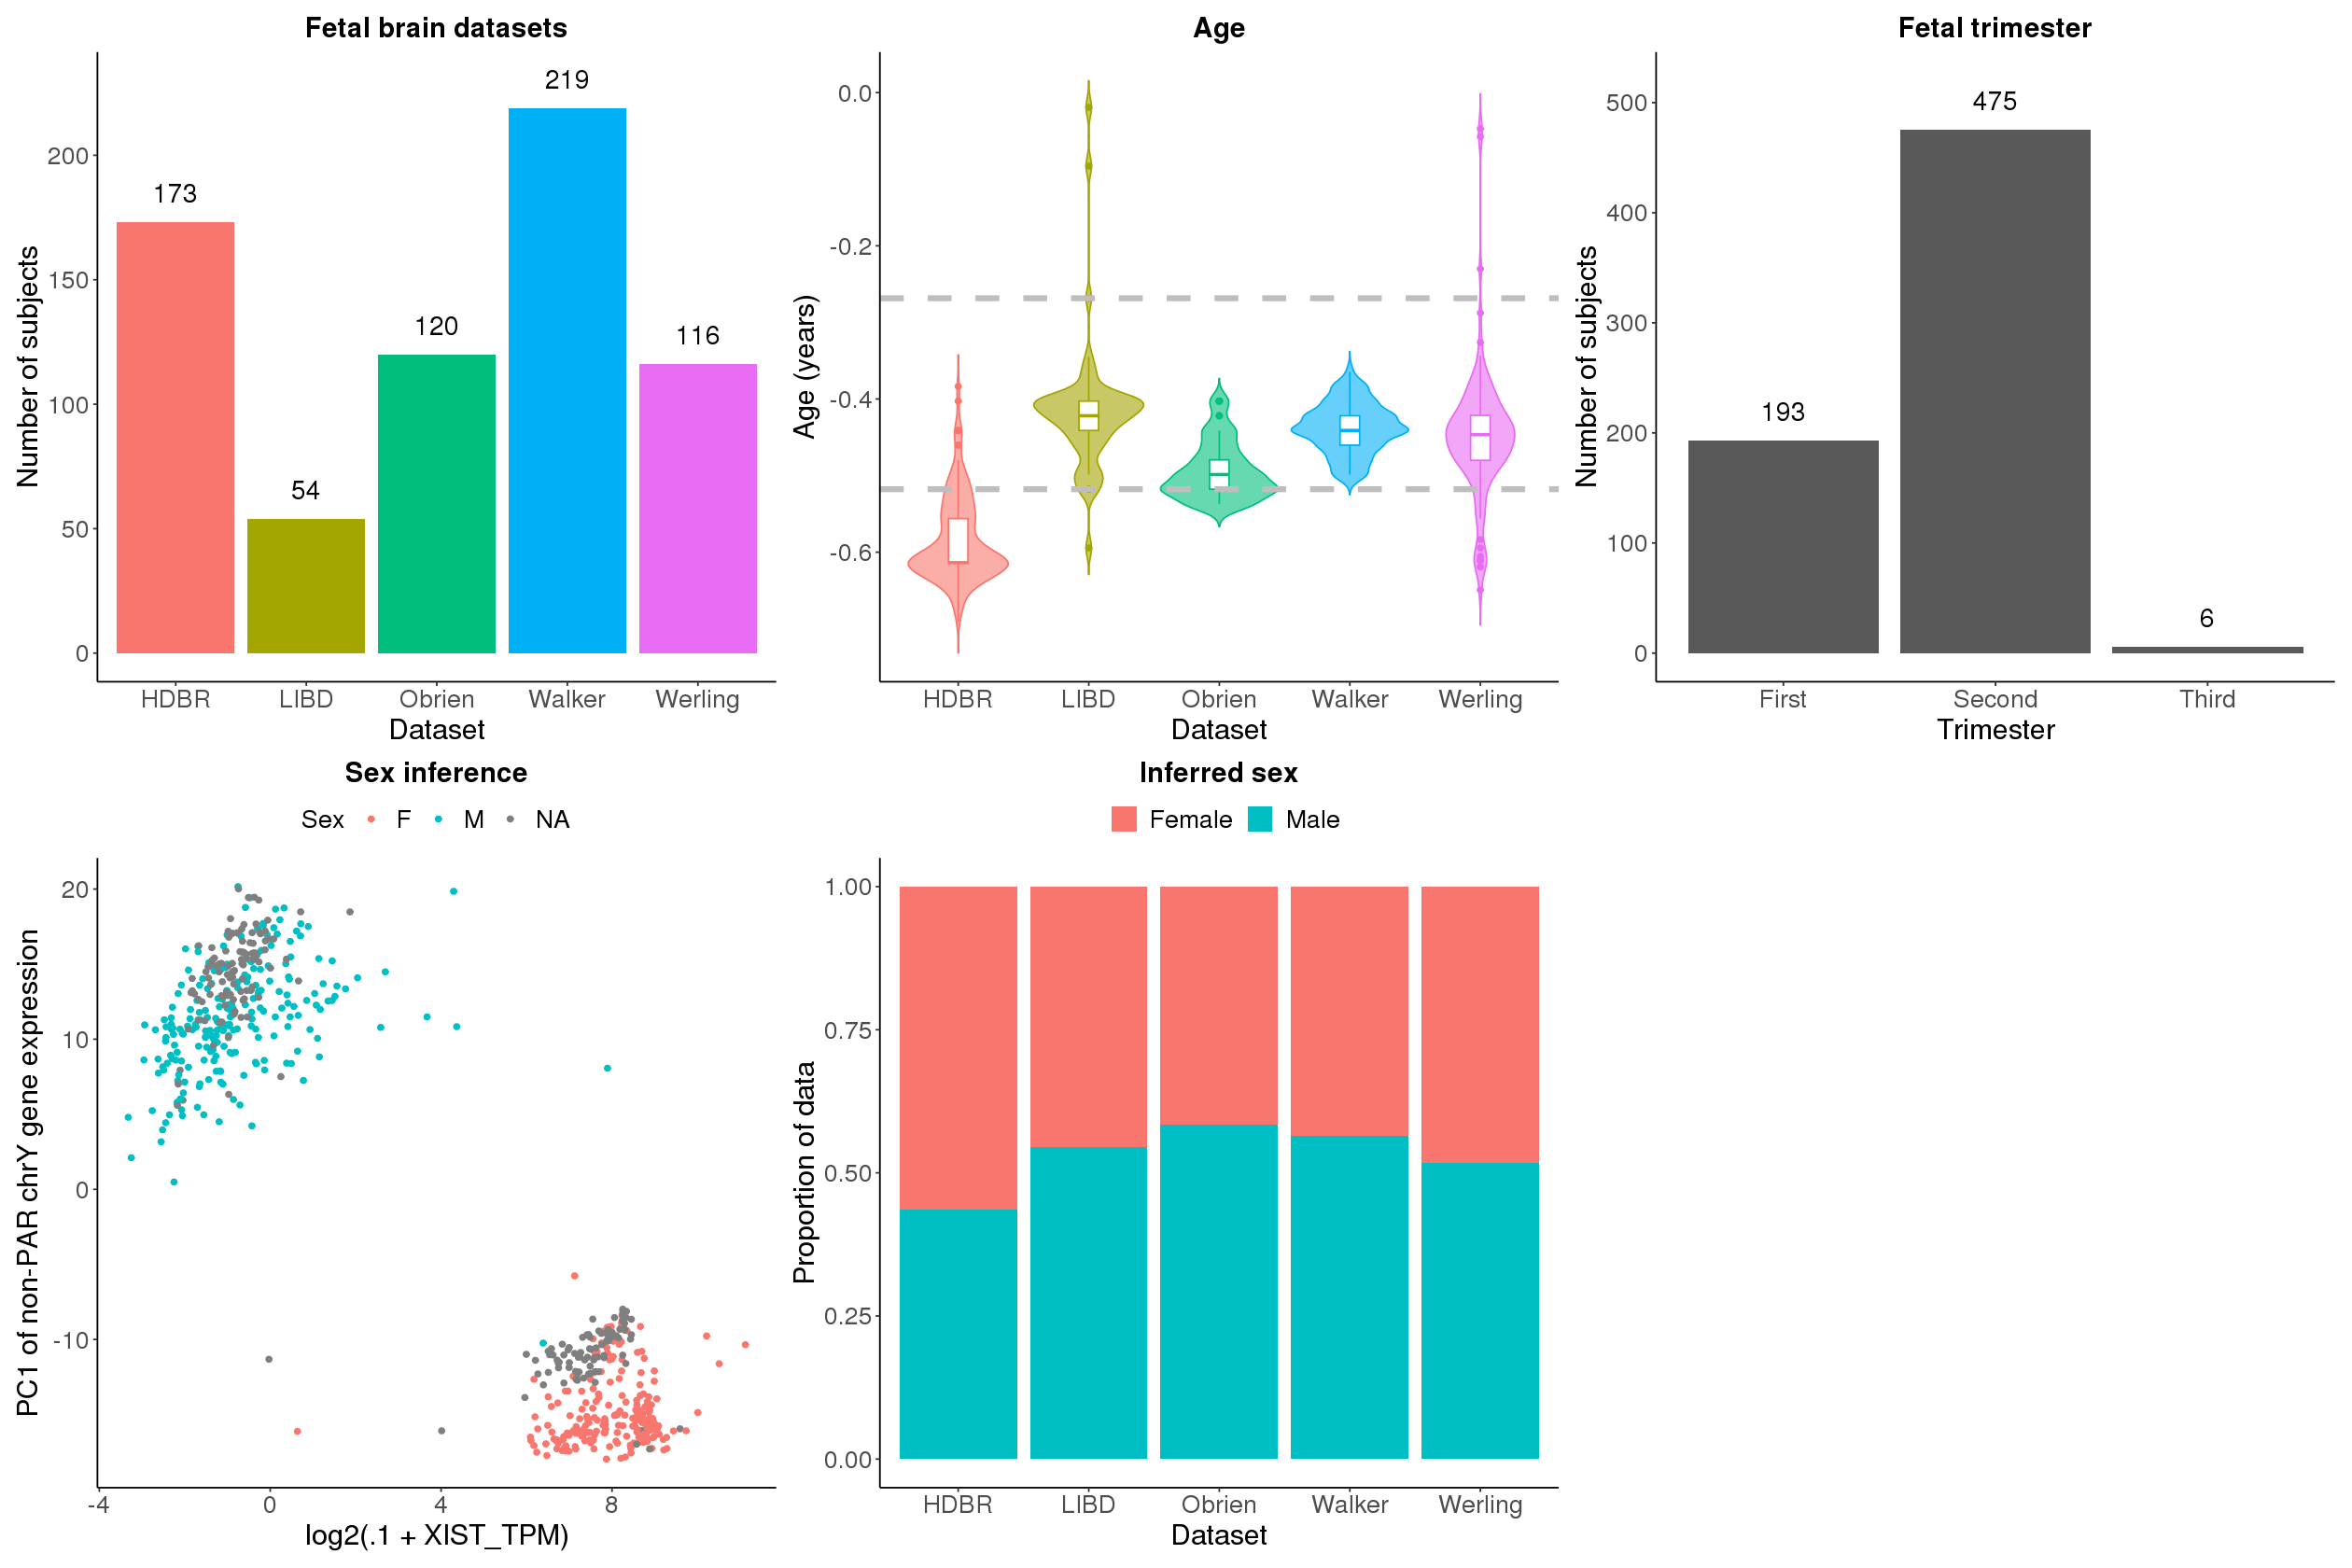

In [45]:
options(repr.plot.width = 21, repr.plot.height = 14)

p <- p1 + p2 + p3 + p6 + p8 +
    plot_layout(ncol = 3) 
#     plot_annotation(tag_level = 'A') &
#         theme(plot.tag = element_text(size = 18, face = "bold"))
p

In [46]:
ggsave("figures/supp.png", p, width = 21, height = 14)